In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
%matplotlib inline
plt.rcParams["font.family"] = "IPAPGothic"

In [180]:
#データ読み込み関数
def read_data(data_path):
    data_name = pd.read_csv(filepath_or_buffer=data_path, encoding="utf_8", sep=",")
    #data_name.info()
    return data_name

#各種データの変換
def conversion_id(df):
    #user_idの固有データの取り出し
    nu = df['user_id'].unique()
    #データフレームからuser_idを抽出
    u_ids = df['user_id']
    #0~31の数値へ変換
    a_post_user = []
    for i in u_ids:
        for j in range(len(nu)):
            if i == nu[j]:
                a_post_user.append(j)
                
    s = pd.DataFrame(a_post_user, columns=['user_id2'])
    df = df.join(s)
    return df

#タグをあるかないかの2値に変換
def check_tag(x):
    if x is not "0":
        return 1
    else:
        return 0
    
#タグの変換
def conversion_tag(df):
    df['tag2'] = df['tag'].apply(check_tag)
    return df

#日付の変換
def conversion_date(df):
    df['postdate'] = pd.to_datetime(df['postdate'], format = '%Y-%m-%d')
    df['date'] = df['postdate'].dt.dayofyear
    return df

#いらないデータの削減
def delete_columns(df):
    df.drop(['screen_name','user_id', 'tweet_id', 'tweet', 'tweet2', 'postdate',
               'cos_day', 'sin_day', 'tag', 'image_url'], axis = 1, inplace=True)
    data = df.loc[:, ['user_id2', 'date', 'tag2', 'image', 'retweet']]
    return data

#データの前処理
def conversion_data(data_path):
    df =  read_data(data_path)
    df = conversion_id(df)
    df = conversion_tag(df)
    df = conversion_date(df)
    return df
    
#相関係数の計算とヒートマップの作成
def calculation_corr(data):
    corr_data = data.corr()
    hmap = sns.heatmap(corr_data, vmax=1, vmin=-1, center=0, annot=True)
    return corr_data, hmap

In [172]:
#データを読み込んで前処理
use_data = conversion_data("Datas/pickup_data.csv")
all_data = conversion_data("Datas/all_data/extract_allData.csv")
best_data = conversion_data("Datas/best_data.csv")
#相関係数の計算に使わないカラムを削除
u_data = delete_columns(use_data)
a_data = delete_columns(all_data)
b_data = delete_columns(best_data)

,user_id2,date,tag2,image,retweet
user_id2,1.000000,0.006132,-0.138853,-0.090019,-0.064034
date,0.006132,1.000000,0.010113,-0.025437,0.031814
tag2,-0.138853,0.010113,1.000000,0.157428,0.164067
image,-0.090019,-0.025437,0.157428,1.000000,0.360797
retweet,-0.064034,0.031814,0.164067,0.360797,1.000000


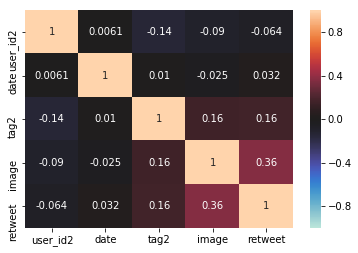

In [181]:
corr_u_data, hu_data = calculation_corr(u_data)
corr_u_data

72.0


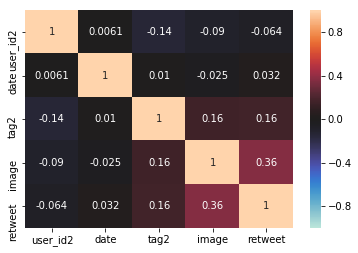

In [185]:
current_dpi = mpl.rcParams['figure.dpi']
print(current_dpi)

plt.figure()
sns.heatmap(corr_u_data, vmax=1, vmin=-1, center=0, annot=True)
plt.savefig('heatmap.png', dpi=current_dpi * 1.5)

,user_id2,date,tag2,image,retweet
user_id2,1.000000,-0.005411,-0.180749,-0.140988,-0.051925
date,-0.005411,1.000000,0.013667,-0.008842,0.022921
tag2,-0.180749,0.013667,1.000000,0.149690,0.134344
image,-0.140988,-0.008842,0.149690,1.000000,0.295685
retweet,-0.051925,0.022921,0.134344,0.295685,1.000000


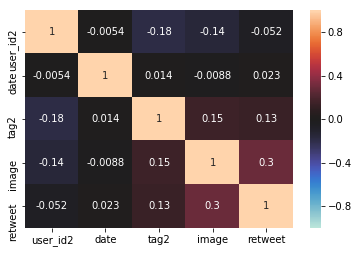

In [174]:
corr_a_data, ha_data = calculation_corr(a_data)
corr_a_data

,user_id2,date,tag2,image,retweet
user_id2,1.000000,-0.096004,-0.171328,-0.287848,-0.166257
date,-0.096004,1.000000,0.052354,0.030406,0.031749
tag2,-0.171328,0.052354,1.000000,0.142938,0.203438
image,-0.287848,0.030406,0.142938,1.000000,0.415366
retweet,-0.166257,0.031749,0.203438,0.415366,1.000000


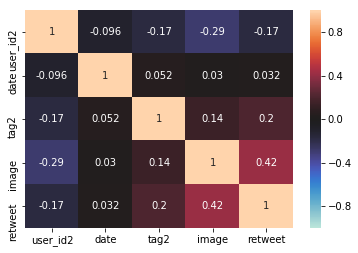

In [175]:
corr_b_data, hb_data = calculation_corr(b_data)
corr_b_data

In [8]:
cross = pd.crosstab(use_data.screen_name,use_data.retweet)
print(cross)

retweet                0.0   1.0
screen_name                     
☆たかたのゆめちゃん☆（公式）        523   182
【花巻温泉公式キャラクター】フクロー      49   283
いわて花巻空港（公式）             88   574
おおふなトン【公式】             101    53
さんてつくん @ 三陸鉄道【鉄ログ】     119   229
ねまるべ遠野@はしご酒＆ジンギスカン       9    31
イーハトーブログ               257   821
ココよちゃん＠いわて【岩手の宿】      1652   267
一関市公式アカウント             118     8
伝承園                    159  1186
奥州市公式アカウント             124    15
岩手県                   1519     1
岩手県地域振興室               294   340
岩手県宮古市公式アカウント          332    61
岩手県広聴広報課               773  1809
岩手県東京事務所               143   134
岩手県盛岡広域振興局             130   498
岩手県警察交通部【公式】            85    87
川源ぶどう園(花巻市)              4     4
盛岡市                    325   418
花巻市                    801   944
花巻観光協会                 137   228
達増拓也 TASSO 希望郷いわて      708    55
遠野たかむろ水光園               15   186
遠野テレビ                  763     3
遠野市生涯現役いきいき促進協議会        42    61
遠野市観光協会/Tono Tourist   127   801
遠野物語を紐解く               539   543
遠野萌えキャラプロジ

In [27]:
cross = pd.crosstab(use_data.postdate,use_data.retweet)
print(cross[754:1119])

retweet     0.0  1.0
postdate            
2018-01-01    6    8
2018-01-02    1   10
2018-01-03    4   10
2018-01-04    4   15
2018-01-05    6   13
2018-01-06    6    7
2018-01-07    5    9
2018-01-08    7   11
2018-01-09    9   11
2018-01-10    8   14
2018-01-11    8   20
2018-01-12    9   25
2018-01-13    7   10
2018-01-14    6    2
2018-01-15   13   13
2018-01-16   11   21
2018-01-17   16   21
2018-01-18    9   22
2018-01-19   21   11
2018-01-20   11   13
2018-01-21    6    6
2018-01-22   13   17
2018-01-23   10   15
2018-01-24   10   15
2018-01-25   19   21
2018-01-26    6   29
2018-01-27    8   10
2018-01-28    8   13
2018-01-29    9   21
2018-01-30    8   15
...         ...  ...
2018-12-02    4    0
2018-12-03   20    0
2018-12-04   11    0
2018-12-05   17    0
2018-12-06    8    0
2018-12-07   10    0
2018-12-08    7    0
2018-12-09    4    0
2018-12-10    6    0
2018-12-11   18    1
2018-12-12   10    1
2018-12-13   11    2
2018-12-14   11    6
2018-12-15    5    0
2018-12-16   

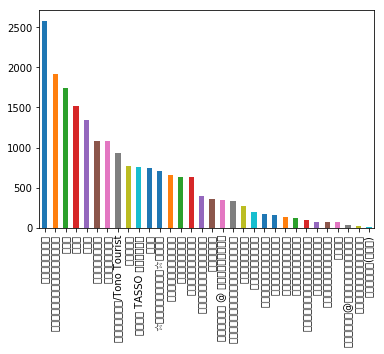

In [35]:
use_data['screen_name'].value_counts().plot.bar()

In [77]:
a_cross = pd.crosstab(all_data.postdate,all_data.retweet)

In [83]:
print(a_cross[762:1127])

retweet     0.0  1.0
postdate            
2018-01-01   16    9
2018-01-02   11   10
2018-01-03    9   10
2018-01-04   23   15
2018-01-05   19   13
2018-01-06   32    7
2018-01-07   23    9
2018-01-08   43   11
2018-01-09   40   11
2018-01-10   39   14
2018-01-11   39   20
2018-01-12   41   25
2018-01-13   38   10
2018-01-14   32    2
2018-01-15   53   13
2018-01-16   34   21
2018-01-17   58   21
2018-01-18   54   23
2018-01-19   85   11
2018-01-20   50   13
2018-01-21   50    6
2018-01-22   54   17
2018-01-23   71   15
2018-01-24   55   15
2018-01-25   64   21
2018-01-26   54   29
2018-01-27   50   10
2018-01-28   59   13
2018-01-29   53   22
2018-01-30   51   15
...         ...  ...
2018-12-02   28    0
2018-12-03   73    0
2018-12-04   52    0
2018-12-05   50    0
2018-12-06   51    0
2018-12-07   58    0
2018-12-08   22    0
2018-12-09   24    0
2018-12-10   39    0
2018-12-11   66    1
2018-12-12   66    1
2018-12-13   62    2
2018-12-14   54    6
2018-12-15   29    0
2018-12-16   

In [112]:
print(a_cross[279:1062])

retweet     0.0  1.0
postdate            
2016-09-05   52    7
2016-09-06   55    5
2016-09-07   43    1
2016-09-08   98    1
2016-09-09  101    3
2016-09-10   27    7
2016-09-11   18   12
2016-09-12   26    6
2016-09-13   34    8
2016-09-14   36    9
2016-09-15   29   10
2016-09-16   33   21
2016-09-17   29    9
2016-09-18   15    7
2016-09-19    4    5
2016-09-20   29   11
2016-09-21   38   13
2016-09-22   19   12
2016-09-23   37   24
2016-09-24   23    7
2016-09-25   20   11
2016-09-26   26   12
2016-09-27   20   15
2016-09-28   27   14
2016-09-29   19   12
2016-09-30   48   21
2016-10-01   46   17
2016-10-02   26    7
2016-10-03   30    5
2016-10-04   37   10
...         ...  ...
2018-09-28   30   18
2018-09-29   42   11
2018-09-30   58    4
2018-10-01   76   10
2018-10-02   33   20
2018-10-03   47   10
2018-10-04   41   24
2018-10-05   36   22
2018-10-06   29    8
2018-10-07   60    6
2018-10-08   24    4
2018-10-09   35   12
2018-10-10   40   13
2018-10-11   33   11
2018-10-12   